In [1]:
import sys
sys.path.append("../")
sys.path.append('C:\Users\James Pino\PycharmProjects\Magine')
from IPython.display import display
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import magine.ontology.enrichment_tools as et
from magine.plotting.heatmaps import cluster_samples_by_time, heatmap_from_array

In [3]:
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]
enrichment_array = pd.read_csv('Data/all_cisplatin_out.csv.gz', index_col=0)
specific_array = et.filter_dataframe(enrichment_array, p_value=0.05, combined_score=0.0,
                                    db=process_dbs, category=['proteomics_up','proteomics_down'])

In [7]:
print(specific_array.shape)
slimmed_array = et.remove_redundant(specific_array, threshold=0.3, verbose=False)
#slimmed_array2 = et.find_similar_terms(specific_array, threshold=0.3)
#terms1 =  set(slimmed_array['term_name'].unique())
#terms2 =  set(slimmed_array2['term_name'].unique())
#print(terms1.difference(terms2))

(2016, 9)
Number of rows went from 2016 to 335


[('combined_score', '01hr'), ('combined_score', '06hr'), ('combined_score', '24hr'), ('combined_score', '48hr')]


combined_score             \
sample_id                                                    01hr       06hr   
term_name                                                                      
mRNA splicing, via spliceosome                         299.866564  87.396296   
SRP-dependent cotranslational protein targeting...     199.191147        NaN   
negative regulation of transcription, DNA-templ...      68.261978        NaN   
osteoblast differentiation                              52.581223  31.428443   
RNA processing                                          50.367880  32.992801   
regulation of alternative mRNA splicing, via sp...      50.187465        NaN   
cytoplasmic translation                                 31.082194        NaN   
negative regulation of translation                      30.886842        NaN   
resolution of meiotic recombination intermediates       29.557281        NaN   
positive regulation of transcription, DNA-templ...      28.459655        NaN   
mitotic cytokinesis                                     24.798241        NaN   
XPodNet - protein-protein interactions in the p...      22.460249  31.301089   
chloride transport                                      22.310453        NaN   
positive regulation of apoptotic process                19.959217  20.743459   
alternative mRNA splicing, via spliceosome              16.212933        NaN   
Validated targets of C-MYC transcriptional repr...      15.369523   9.328038   
Regulation of Telomerase_Homo sapiens_4dfe97ca-...      14.719095  22.768191   
positive regulation of translation                      14.644372  15.598548   
Deactivation of the beta-catenin transactivatin...      14.531321   4.264412   
positive regulation of viral genome replication         14.467042        NaN   

                                                                            
sample_id                                                 24hr        48hr  
term_name                                                                   
mRNA splicing, via spliceosome                      209.979563  234.079702  
SRP-dependent cotranslational protein targeting...  501.755701  730.868622  
negative regulation of transcription, DNA-templ...   18.457840         NaN  
osteoblast differentiation                           25.773801   23.651888  
RNA processing                                       12.686456   20.618796  
regulation of alternative mRNA splicing, via sp...   45.264258    5.882917  
cytoplasmic translation                              35.412432   47.198144  
negative regulation of translation                   17.680226   35.226168  
resolution of meiotic recombination intermediates          NaN         NaN  
positive regulation of transcription, DNA-templ...         NaN         NaN  
mitotic cytokinesis                                        NaN   15.071366  
XPodNet - protein-protein interactions in the p...   35.214674   53.036321  
chloride transport                                         NaN         NaN  
positive regulation of apoptotic process             53.817781   27.407556  
alternative mRNA splicing, via spliceosome                 NaN         NaN  
Validated targets of C-MYC transcriptional repr...         NaN         NaN  
Regulation of Telomerase_Homo sapiens_4dfe97ca-...   30.694159    5.574265  
positive regulation of translation                   21.737366   14.577481  
Deactivation of the beta-catenin transactivatin...         NaN         NaN  
positive regulation of viral genome replication            NaN         NaN

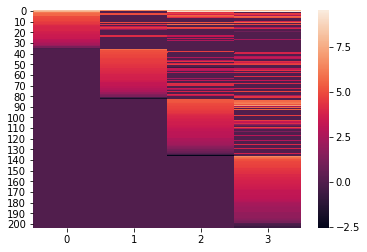

In [8]:

array = pd.pivot_table(slimmed_array, index='term_name', columns='sample_id', values=['combined_score'])
time_sorted = [('combined_score', i) for i in sorted(slimmed_array['sample_id'].unique())]
print(time_sorted)
# time_sorted = [('combined_score', '06hr'), ('combined_score', '24hr'), ('combined_score', '01hr')]
array = array.sort_values(by=time_sorted, ascending=False)
display(array.head(20))
array = array['combined_score'].as_matrix()
fig = heatmap_from_array(array, convert_to_log=True)

